# Customer Segmentation using Clustering
***
This mini-project is based on [this blog post](http://blog.yhat.com/posts/customer-segmentation-using-python.html) by yhat. Please feel free to refer to the post for additional information, and solutions.

In [2]:
%matplotlib inline
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Setup Seaborn
sns.set_style("whitegrid")
sns.set_context("poster")

## Data

The dataset contains information on marketing newsletters/e-mail campaigns (e-mail offers sent to customers) and transaction level data from customers. The transactional data shows which offer customers responded to, and what the customer ended up buying. The data is presented as an Excel workbook containing two worksheets. Each worksheet contains a different dataset.

In [3]:
!pip install xlrd

df_offers = pd.read_excel("./WineKMC.xlsx", sheetname=0)
df_offers.columns = ["offer_id", "campaign", "varietal", "min_qty", "discount", "origin", "past_peak"]
df_offers.head()

C:\Springboard\Miniconda\lib\site-packages\pandas\util\_decorators.py:188: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  return func(*args, **kwargs)


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak
0,1,January,Malbec,72,56,France,False
1,2,January,Pinot Noir,72,17,France,False
2,3,February,Espumante,144,32,Oregon,True
3,4,February,Champagne,72,48,France,True
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True


We see that the first dataset contains information about each offer such as the month it is in effect and several attributes about the wine that the offer refers to: the variety, minimum quantity, discount, country of origin and whether or not it is past peak. The second dataset in the second worksheet contains transactional data -- which offer each customer responded to.

In [4]:
df_transactions = pd.read_excel("./WineKMC.xlsx", sheetname=1)
df_transactions.columns = ["customer_name", "offer_id"]
df_transactions['n'] = 1
df_transactions.head()

,customer_name,offer_id,n
0,Smith,2,1
1,Smith,24,1
2,Johnson,17,1
3,Johnson,24,1
4,Johnson,26,1


## Data wrangling

We're trying to learn more about how our customers behave, so we can use their behavior (whether or not they purchased something based on an offer) as a way to group similar minded customers together. We can then study those groups to look for patterns and trends which can help us formulate future offers.

The first thing we need is a way to compare customers. To do this, we're going to create a matrix that contains each customer and a 0/1 indicator for whether or not they responded to a given offer. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a data frame where each row has the following columns (Use the pandas [`merge`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) and [`pivot_table`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html) functions for this purpose):
<ul>
<li> customer_name
<li> One column for each offer, with a 1 if the customer responded to the offer
</ul>
<p>Make sure you also deal with any weird values such as `NaN`. Read the documentation to develop your solution.</p>
</div>

In [5]:
#your turn
responses = df_offers.merge(df_transactions, on='offer_id', how='left')
responses.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,customer_name,n
0,1,January,Malbec,72,56,France,False,Thomas,1
1,1,January,Malbec,72,56,France,False,Jackson,1
2,1,January,Malbec,72,56,France,False,Mitchell,1
3,1,January,Malbec,72,56,France,False,Peterson,1
4,1,January,Malbec,72,56,France,False,Wood,1


In [6]:
import numpy as np
successful_sales = pd.pivot_table(responses, values='n', index='customer_name',
                                  columns='offer_id', aggfunc=np.sum, fill_value=0)
successful_sales

offer_id,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
customer_name,,,,,,,,,,,,,,,,,,,,,
Adams,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
Allen,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
Anderson,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bailey,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
Baker,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Barnes,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
Bell,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
Bennett,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Brooks,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Store the list of customer names for later in case we need it
customer_list = successful_sales.index

# Extract only the numerical data from the sales table above
successful_sales = successful_sales.reset_index(drop=True)
sales_matrix = np.array(successful_sales)
sales_matrix

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 1]], dtype=int64)

In [8]:
# Confirm that the numerical sales data is the correct shape (100 customers x 32 offers)
sales_matrix.shape

(100L, 32L)

## K-Means Clustering

Recall that in K-Means Clustering we want to *maximize* the distance between centroids and *minimize* the distance between data points and the respective centroid for the cluster they are in. True evaluation for unsupervised learning would require labeled data; however, we can use a variety of intuitive metrics to try to pick the number of clusters K. We will introduce two methods: the Elbow method, the Silhouette method and the gap statistic.

### Choosing K: The Elbow Sum-of-Squares Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set II</h3>

<p><b>Exercise:</b></p> 
<ul>
<li> What values of $SS$ do you believe represent better clusterings? Why?
<li> Create a numpy matrix `x_cols` with only the columns representing the offers (i.e. the 0/1 colums) 
<li> Write code that applies the [`KMeans`](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) clustering method from scikit-learn to this matrix. 
<li> Construct a plot showing $SS$ for each $K$ and pick $K$ using this plot. For simplicity, test $2 \le K \le 10$.
<li> Make a bar chart showing the number of points in each cluster for k-means under the best $K$.
<li> What challenges did you experience using the Elbow method to pick $K$?
</ul>
</div>

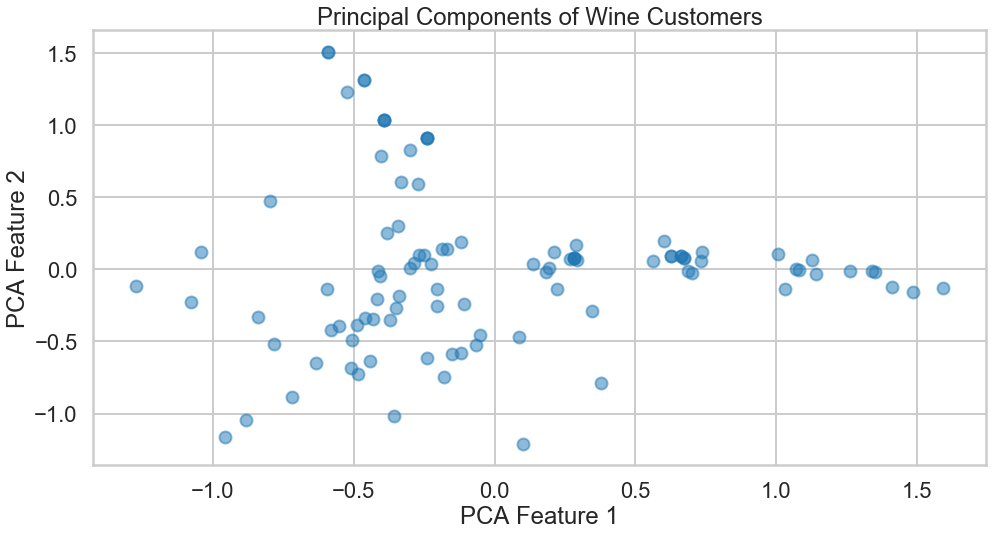

In [9]:
# Perform Principal Component Analysis on the sales data to group customers based on apparent similarities in 
# their taste in wine, with arbitrary abstract features as the x-axis and y-axis.

from sklearn.decomposition import PCA
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

pca = PCA(n_components=2)
sales_pca = pca.fit_transform(sales_matrix)
sales_x = sales_pca[:, 0]
sales_y = sales_pca[:, 1]

plt.scatter(sales_x, sales_y, alpha=0.5)
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.title('Principal Components of Wine Customers')
plt.show()

In [10]:
# Calculate the inertia (sum of squares of distance from centroids) for each possible value of K

from sklearn.cluster import KMeans
inertias = []
cluster_options = range(2, 11)
for k in cluster_options:
    model = KMeans(n_clusters = k)
    model.fit(sales_pca)
    inertias.append(model.inertia_)

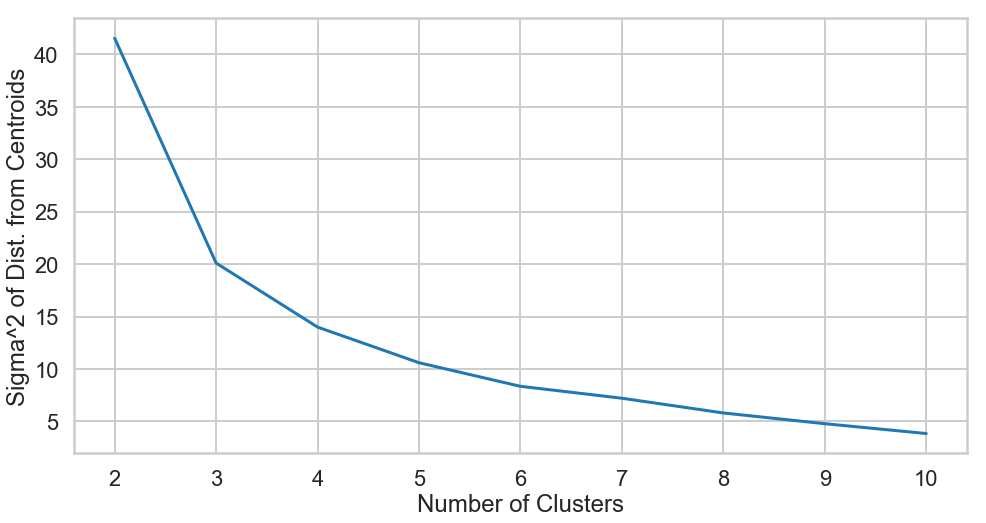

In [11]:
# Chart the inertia relative to the values of K

plt.plot(cluster_options, inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Sigma^2 of Dist. from Centroids')
plt.show()

The elbow method is somewhat less than satisfactory as applied to this dataset because there is no obvious single inflection point in the graph -- the second derivative is clearly positive all along the curve from k=2 thorugh k=6, indicating that each additional cluster is of less marginal use than the cluster that was added immediately before it. Adding additional clusters beyond k=6 is still helpful, but less so; each additional cluster adds a roughly constant gain, i.e., the second derivative of inertia with respect to clusters is approximately zero when n_clusters > 6. 

The closest feature to an elbow that I can identify occurs at k=3; this point seems to have the elbow that appears visually "sharpest" on the graph. It will be worthwhile to actually calculate the inertia here.

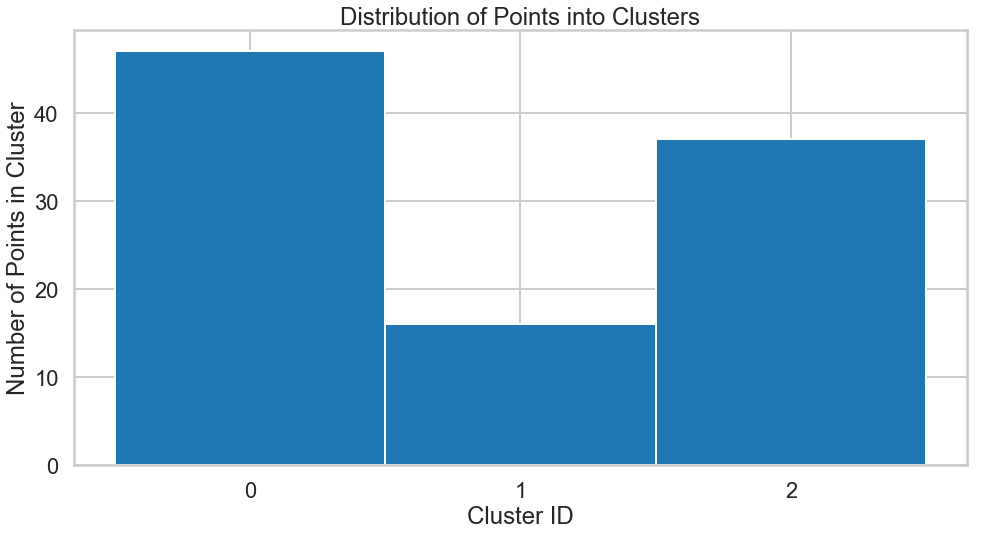

In [12]:
# Assign each point to one of 3 clusters
model3 = KMeans(n_clusters=3)
model3.fit(sales_pca)
results = model3.predict(sales_pca)
results_df = pd.DataFrame(results)
bins = [float(i) - 0.5 for i in range(0, 4)]
results_df.hist(bins=bins)
plt.xlabel('Cluster ID')
plt.ylabel('Number of Points in Cluster')
plt.xticks([0, 1, 2])
plt.title('Distribution of Points into Clusters')
plt.show()

This bar chart is moderately concerning: depending on which random seed is selected, the cluster that has the largest number of points changes, and the ratio between the number of points in the largest cluster and the smallest cluster also varies freely, with ratios between 3:2 and 5:1. This kind of variation is not impossible, but it adds further doubt to our tentative conclusion that this data really has 3 distinct clusters.

In [13]:
# Check the cluster assignment to ensure that it shows plausible values
results_df.head(10)

,0
0,2
1,0
2,1
3,2
4,0
5,0
6,1
7,2
8,0
9,2


In [14]:
# Convert the numpy PCA array to a Pandas Dataframe and add the cluster predictions as color codes

sales_pca_df = pd.DataFrame(sales_pca)
sales_pca_df['color'] = results_df[0].values
sales_pca_df.columns = ['x', 'y', 'color']
sales_pca_df.head()

,x,y,color
0,1.007580,0.108215,2
1,-0.287539,0.044715,0
2,-0.392032,1.038391,1
3,0.699477,-0.022542,2
4,0.088183,-0.471695,0


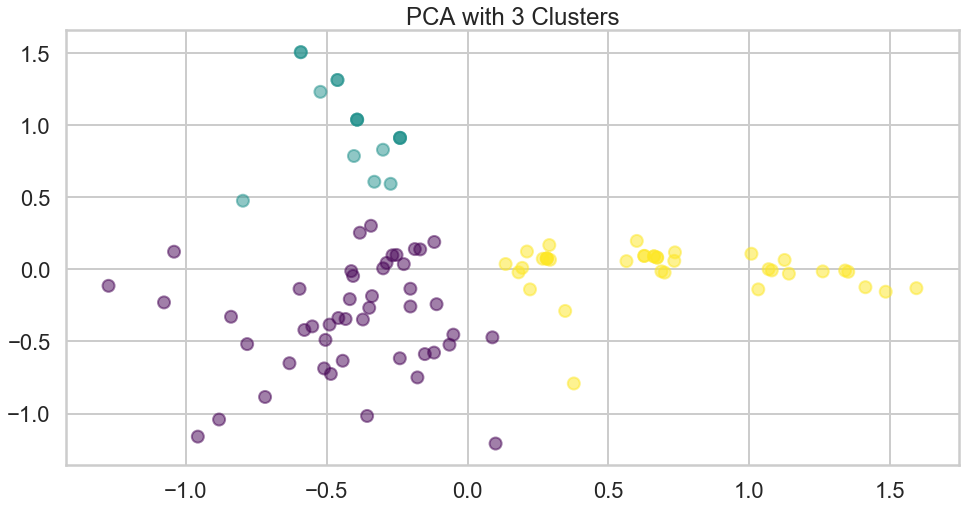

In [15]:
# Illustrate the 3 clusters in the PCA

plt.scatter(sales_pca_df['x'], sales_pca_df['y'], c=sales_pca_df['color'], alpha=0.5, cmap='viridis')
plt.title('PCA with 3 Clusters')
plt.show()

### Choosing K: The Silhouette Method

There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

<pre>

| Range       | Interpretation                                |
|-------------|-----------------------------------------------|
| 0.71 - 1.0  | A strong structure has been found.            |
| 0.51 - 0.7  | A reasonable structure has been found.        |
| 0.26 - 0.5  | The structure is weak and could be artificial.|
| < 0.25      | No substantial structure has been found.      |

</pre>
Source: http://www.stat.berkeley.edu/~spector/s133/Clus.html

Fortunately, scikit-learn provides a function to compute this for us (phew!) called [`sklearn.metrics.silhouette_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html). Take a look at [this article](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) on picking $K$ in scikit-learn, as it will help you in the next exercise set.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Using the documentation for the `silhouette_score` function above, construct a series of silhouette plots like the ones in the article linked above.</p>

<p><b>Exercise:</b> Compute the average silhouette score for each $K$ and plot it. What $K$ does the plot suggest we should choose? Does it differ from what we found using the Elbow method?</p>
</div>

Automatically created module for IPython interactive environment
('For n_clusters =', 2, 'The average silhouette_score is :', 0.41220654905764287)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.5303468047950125)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.44880129380706096)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.4701229490768564)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.47128454248135687)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.4970669122370689)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.5138557320509833)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.5114354083070767)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.5111745510861957)


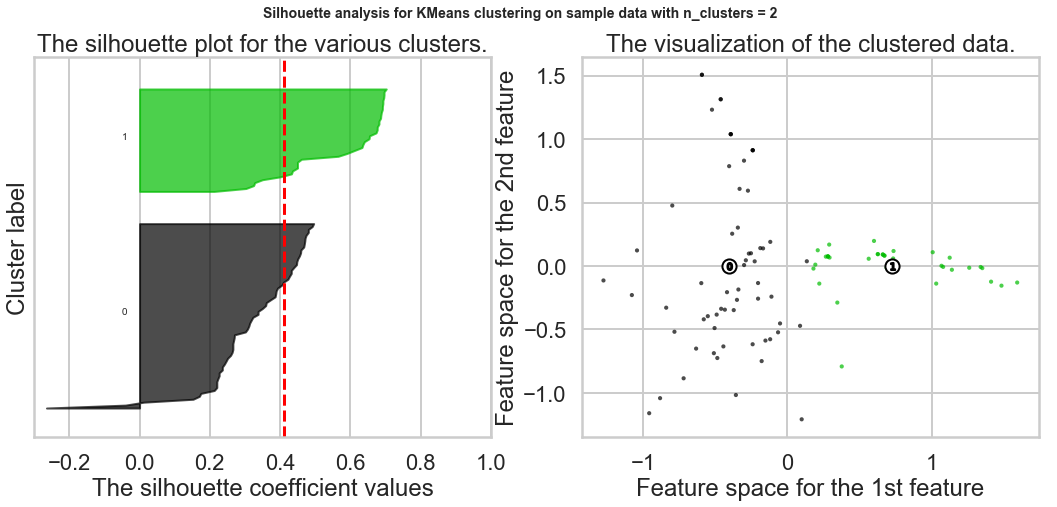

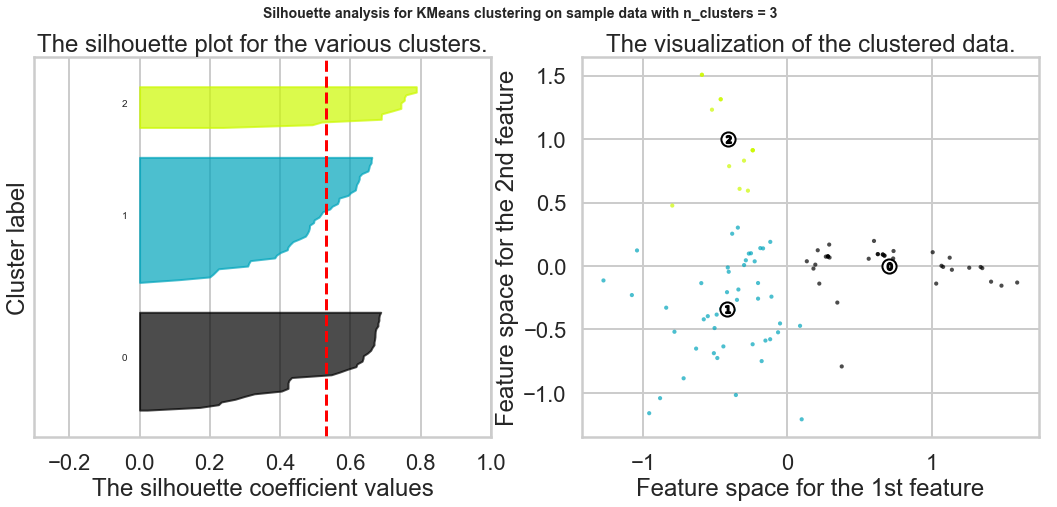

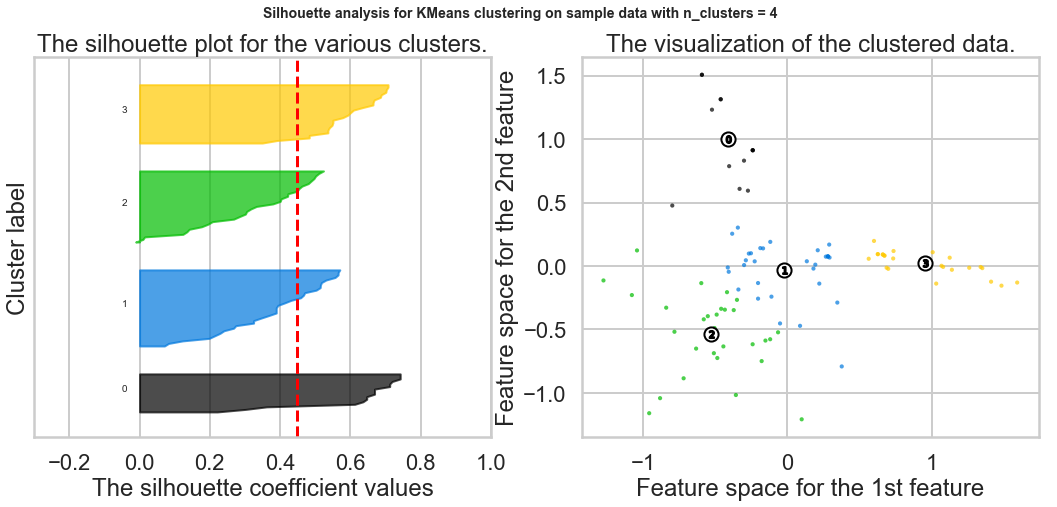

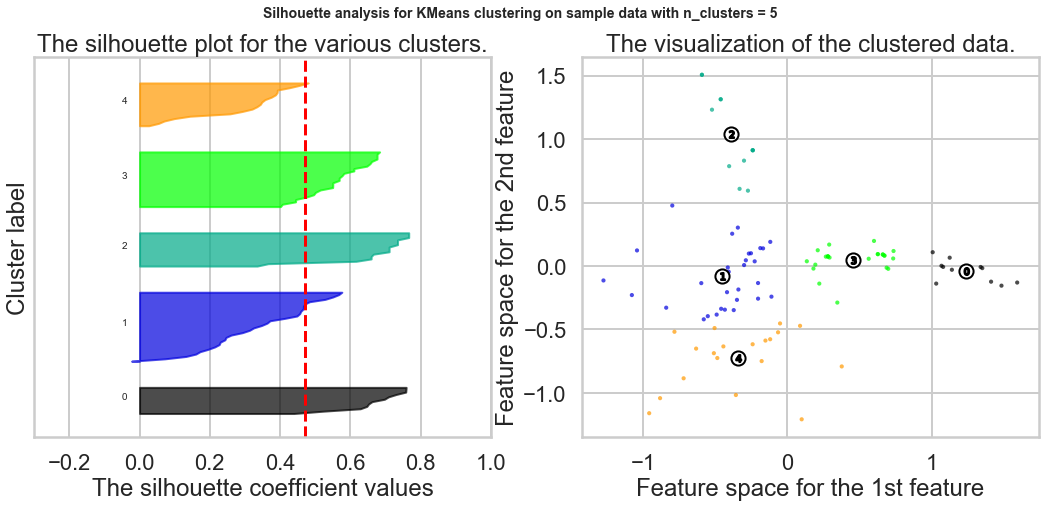

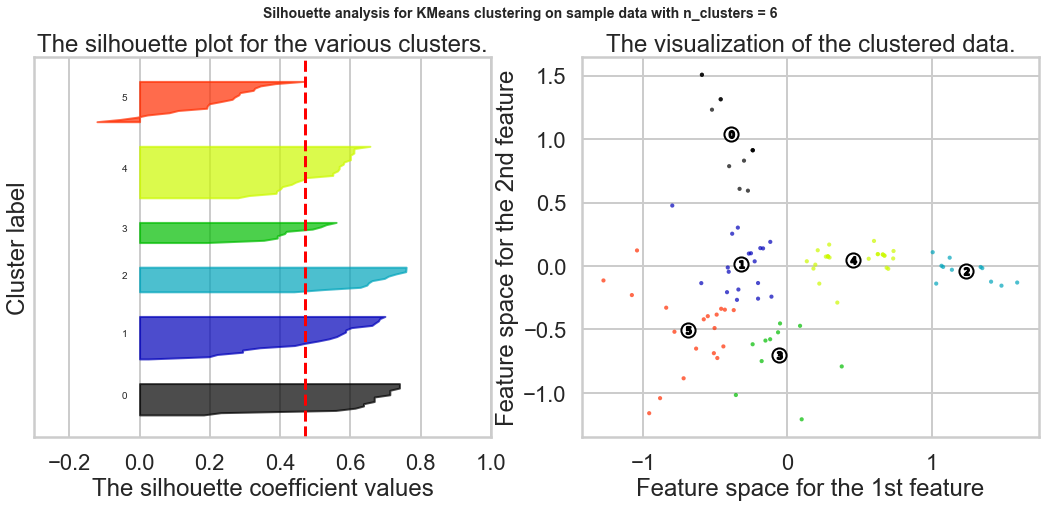

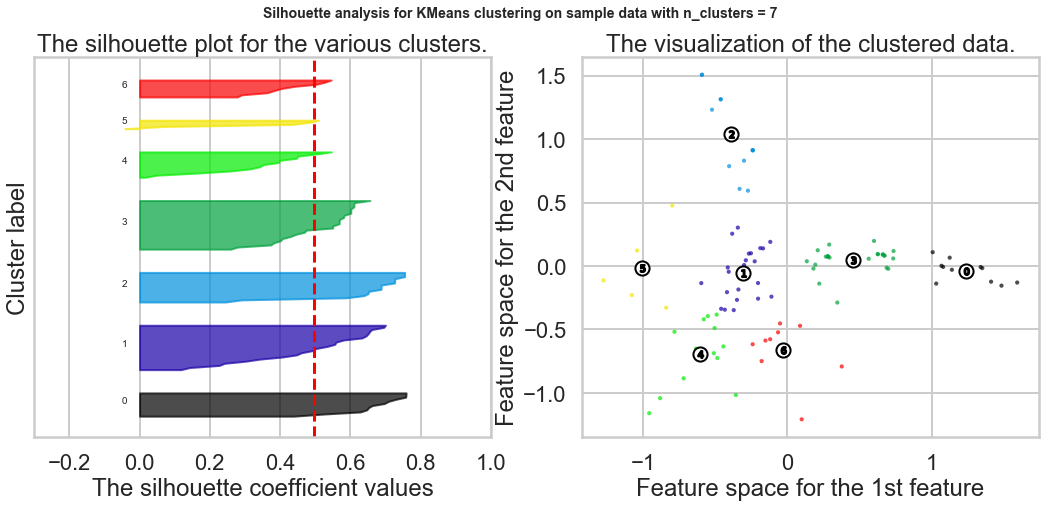

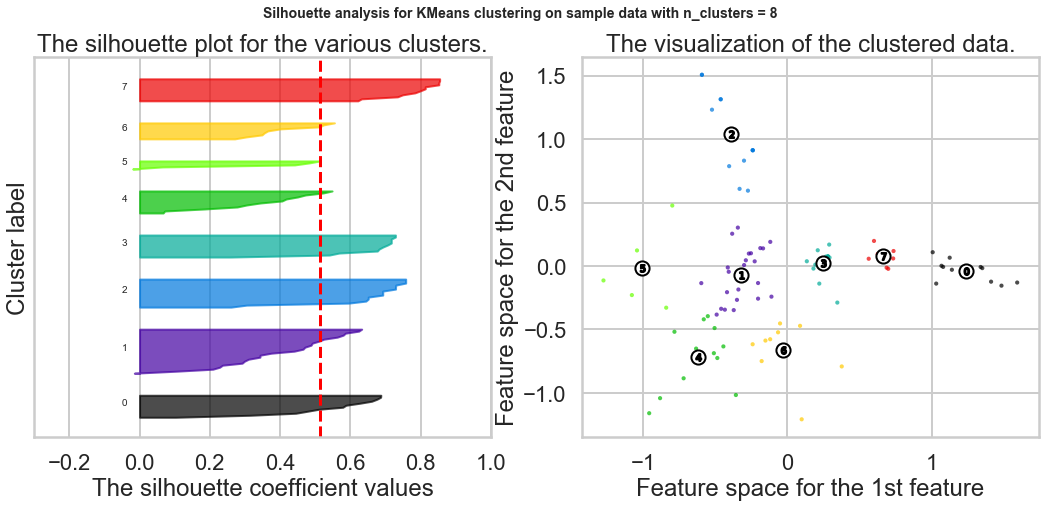

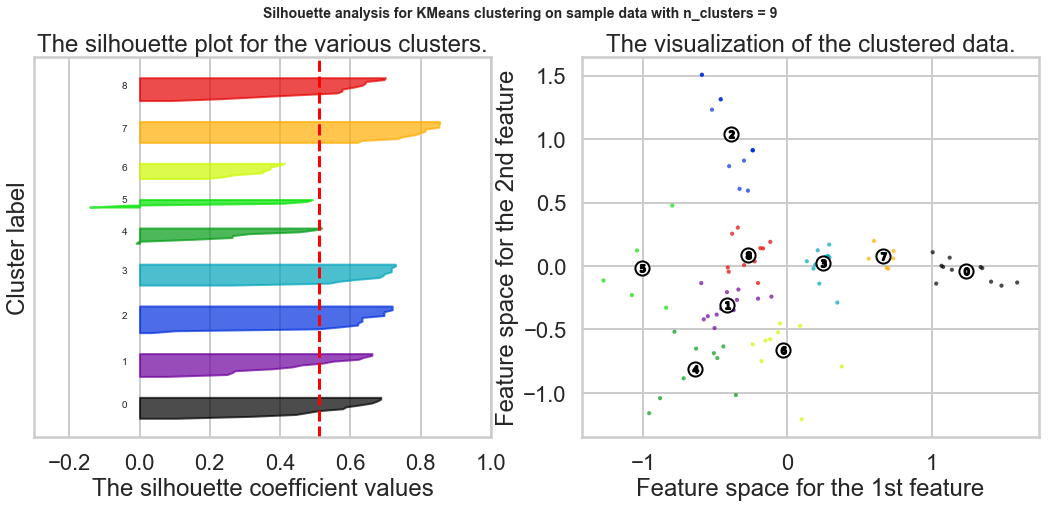

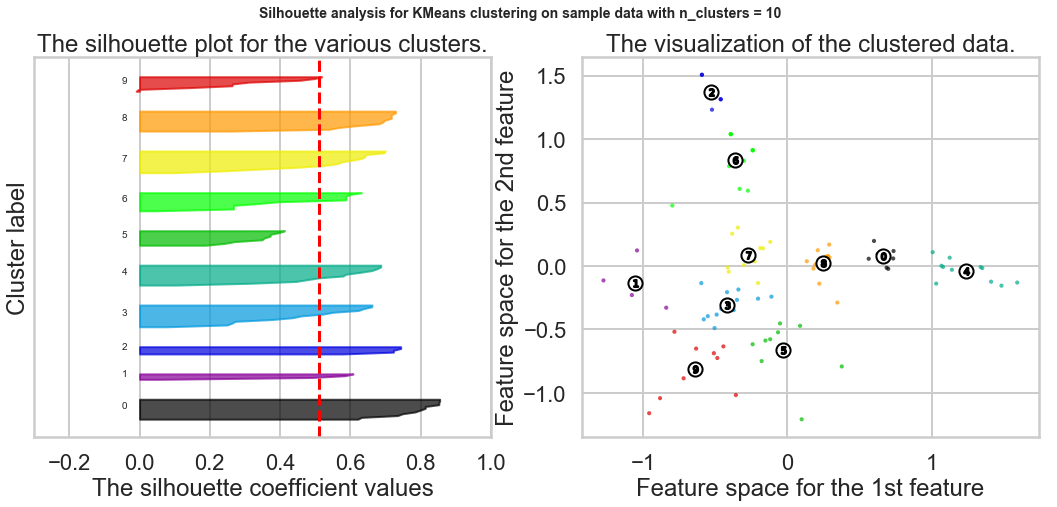

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
X = sales_pca

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.3, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(sales_x, sales_y, marker='.', s=70, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

The maximum silhouette value occurs for K = 3, which matches the elbow plot. We can be reasonably confident that 3 is the most useful number of clusters for this model because the silhouette is notably higher at k=3 than at either k=2 or k=4; the graph drops off significantly in both directions. Moreover, the silhouette plateaus noticeably after k>7, suggesting that any further addition of clusters is counter-productive over-fitting.

The detailed silhouette plot for k=3 is satisfying, with all silhouette maximums extending over the average line of ~0.53, and no silhouette minimums dipping below 0.

The cluster centroids for k=3 appear reasonable and could plausibly be the centroids of the distribution as it is depicted. In general, all of the results here are consistent with the text of 0.51-0.70, i.e., a reasonable structure has been found. The structure is not guaranteed to be accurate, but it is most likely a useful model.

### Choosing $K$: The Gap Statistic

There is one last method worth covering for picking $K$, the so-called Gap statistic. The computation for the gap statistic builds on the sum-of-squares established in the Elbow method discussion, and compares it to the sum-of-squares of a "null distribution," that is, a random set of points with no clustering. The estimate for the optimal number of clusters $K$ is the value for which $\log{SS}$ falls the farthest below that of the reference distribution:

$$G_k = E_n^*\{\log SS_k\} - \log SS_k$$

In other words a good clustering yields a much larger difference between the reference distribution and the clustered data. The reference distribution is a Monte Carlo (randomization) procedure that constructs $B$ random distributions of points within the bounding box (limits) of the original data and then applies K-means to this synthetic distribution of data points.. $E_n^*\{\log SS_k\}$ is just the average $SS_k$ over all $B$ replicates. We then compute the standard deviation $\sigma_{SS}$ of the values of $SS_k$ computed from the $B$ replicates of the reference distribution and compute

$$s_k = \sqrt{1+1/B}\sigma_{SS}$$

Finally, we choose $K=k$ such that $G_k \geq G_{k+1} - s_{k+1}$.

### Aside: Choosing $K$ when we Have Labels

Unsupervised learning expects that we do not have the labels. In some situations, we may wish to cluster data that is labeled. Computing the optimal number of clusters is much easier if we have access to labels. There are several methods available. We will not go into the math or details since it is rare to have access to the labels, but we provide the names and references of these measures.

* Adjusted Rand Index
* Mutual Information
* V-Measure
* Fowlkes–Mallows index

See [this article](http://scikit-learn.org/stable/modules/clustering.html) for more information about these metrics.

## Visualizing Clusters using PCA

How do we visualize clusters? If we only had two features, we could likely plot the data as is. But we have 100 data points each containing 32 features (dimensions). Principal Component Analysis (PCA) will help us reduce the dimensionality of our data from 32 to something lower. For a visualization on the coordinate plane, we will use 2 dimensions. In this exercise, we're going to use it to transform our multi-dimensional dataset into a 2 dimensional dataset.

This is only one use of PCA for dimension reduction. We can also use PCA when we want to perform regression but we have a set of highly correlated variables. PCA untangles these correlations into a smaller number of features/predictors all of which are orthogonal (not correlated). PCA is also used to reduce a large set of variables into a much smaller one.

<div class="span5 alert alert-info">
<h3>Checkup Exercise Set IV</h3>

<p><b>Exercise:</b> Use PCA to plot your clusters:</p>

<ul>
<li> Use scikit-learn's [`PCA`](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) function to reduce the dimensionality of your clustering data to 2 components
<li> Create a data frame with the following fields:
  <ul>
  <li> customer name
  <li> cluster id the customer belongs to
  <li> the two PCA components (label them `x` and `y`)
  </ul>
<li> Plot a scatterplot of the `x` vs `y` columns
<li> Color-code points differently based on cluster ID
<li> How do the clusters look? 
<li> Based on what you see, what seems to be the best value for $K$? Moreover, which method of choosing $K$ seems to have produced the optimal result visually?
</ul>

<p><b>Exercise:</b> Now look at both the original raw data about the offers and transactions and look at the fitted clusters. Tell a story about the clusters in context of the original data. For example, do the clusters correspond to wine variants or something else interesting?</p>
</div>

I already plotted the data using PCA in the section above, because plotting the data without PCA resulted in random noise. Without PCA, there was no silhouette score above 0.15, there was no obvious candidate for the correct number of clusters, and the scatterplot appeared visually to be mere static, with no plausible groupings. Choosing 7 clusters appeared marginally more satisfying than other numbers of clusters, but the results were still unremarkable.

In [17]:
# Add cluster data to original database
df_offers['cluster'] = results_df
df_offers.head()


,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,cluster
0,1,January,Malbec,72,56,France,False,2
1,2,January,Pinot Noir,72,17,France,False,0
2,3,February,Espumante,144,32,Oregon,True,1
3,4,February,Champagne,72,48,France,True,2
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,0


In [18]:
# Split the database based on cluster

cluster1 = df_offers[df_offers['cluster'] == 0]
cluster2 = df_offers[df_offers['cluster'] == 1]
cluster3 = df_offers[df_offers['cluster'] == 2]
cluster1.head()

,offer_id,campaign,varietal,min_qty,discount,origin,past_peak,cluster
1,2,January,Pinot Noir,72,17,France,False,0
4,5,February,Cabernet Sauvignon,144,44,New Zealand,True,0
5,6,March,Prosecco,144,86,Chile,False,0
8,9,April,Chardonnay,144,57,Chile,False,0
10,11,May,Champagne,72,85,France,False,0


In [19]:
rows = [cluster1, cluster2, cluster3]
cols = ['campaign', 'varietal', 'discount', 'origin']
blargh = enumerate(cols)
for a, b in blargh:
    print(a)

0
1
2
3


In [20]:
for row in rows:
    for col in cols:
        print(row[col].values)

[u'January' u'February' u'March' u'April' u'May' u'June' u'July' u'August'
 u'September' u'September' u'October' u'October' u'November' u'November']
[u'Pinot Noir' u'Cabernet Sauvignon' u'Prosecco' u'Chardonnay'
 u'Champagne' u'Merlot' u'Pinot Noir' u'Cabernet Sauvignon' u'Chardonnay'
 u'Pinot Noir' u'Pinot Noir' u'Champagne' u'Cabernet Sauvignon'
 u'Pinot Grigio']
[17 44 86 57 85 64 47 82 39 34 83 88 56 87]
[u'France' u'New Zealand' u'Chile' u'Chile' u'France' u'Chile' u'Germany'
 u'Italy' u'South Africa' u'Italy' u'Australia' u'New Zealand' u'France'
 u'France']
[u'February' u'March' u'May' u'June' u'July' u'October' u'December']
[u'Espumante' u'Prosecco' u'Prosecco' u'Merlot' u'Espumante'
 u'Cabernet Sauvignon' u'Malbec']
[32 40 83 88 50 59 54]
[u'Oregon' u'Australia' u'Australia' u'California' u'Oregon' u'Oregon'
 u'France']
[u'January' u'February' u'March' u'April' u'May' u'June' u'July' u'August'
 u'August' u'December' u'December']
[u'Malbec' u'Champagne' u'Espumante' u'Prosecco'

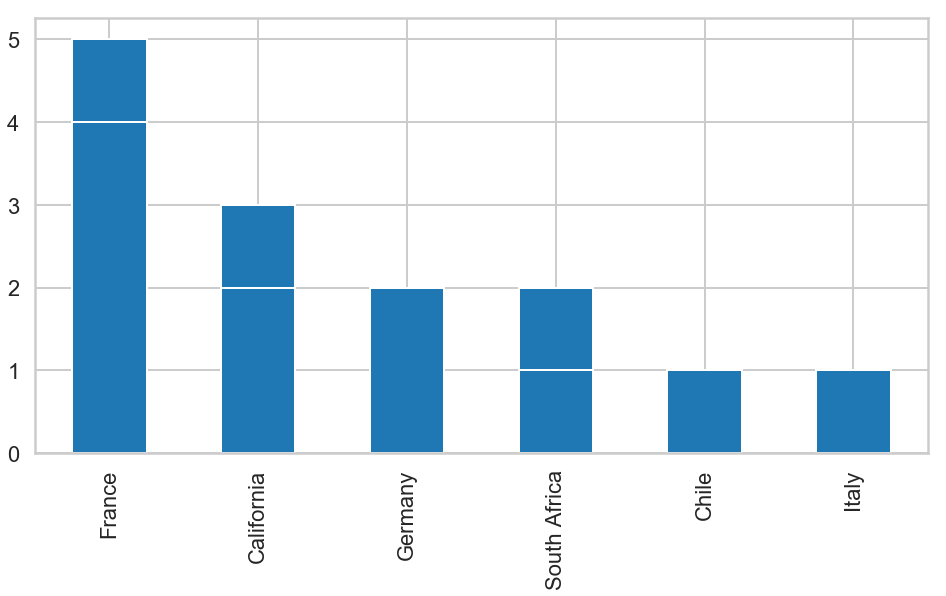

In [21]:
for row in rows:
    for col in cols:
        _ = row[col].value_counts().plot('bar')
plt.show()

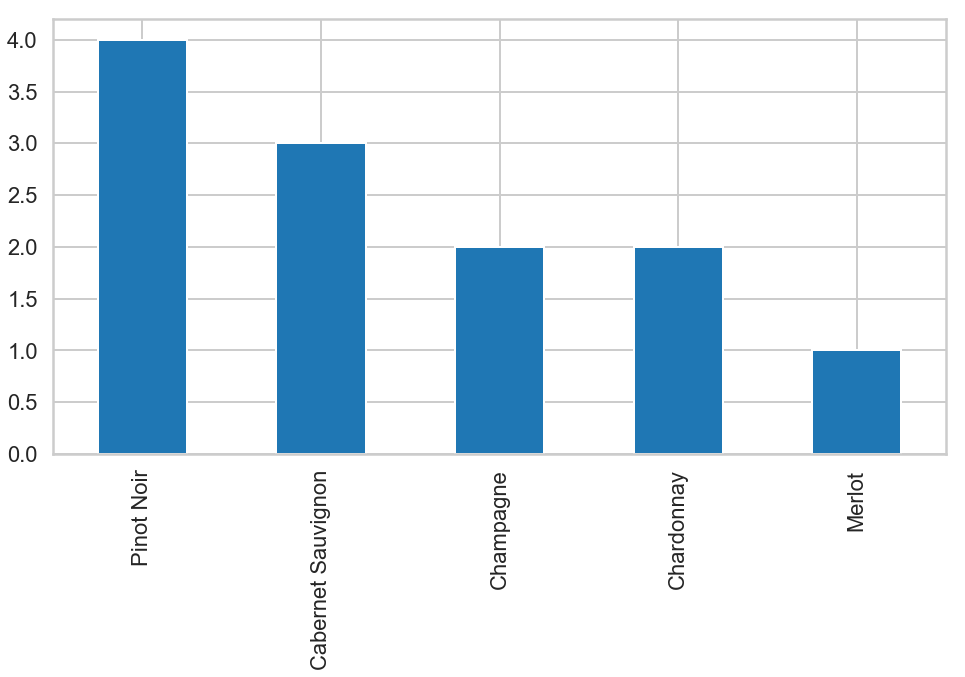

In [22]:
cluster1['varietal'].value_counts().head().plot('bar')

In [23]:
# Preview the counts of categorical values to identify promising candidates for visual analysis

cols = ['campaign', 'varietal', 'discount', 'origin', 'min_qty']


for col in cols:
    print(df_offers[col].value_counts().head())

December    3
June        3
July        3
May         3
August      3
Name: campaign, dtype: int64
Champagne             7
Cabernet Sauvignon    6
Prosecco              4
Pinot Noir            4
Espumante             3
Name: varietal, dtype: int64
56    2
50    2
45    2
88    2
83    2
Name: discount, dtype: int64
France     9
Chile      4
Oregon     3
Germany    3
Italy      3
Name: origin, dtype: int64
72     14
144     7
6       7
12      4
Name: min_qty, dtype: int64


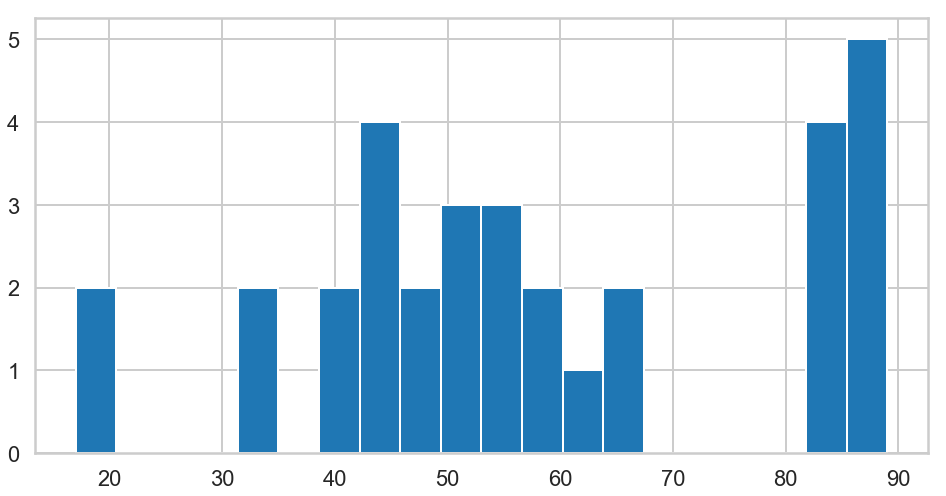

In [24]:
# Based on the preview above, the month does not seem to show any interesting variation, but the varietals, origins, 
# and quantities look potentially interesting. The discounts are numerical, not catgorical, so they will need to be
# plotted and correlated to see if they clump together in an interesting way.

df_offers['discount'].hist(bins=20)

In [25]:
# The discounts appear to break into three loose clusters: d<20, 30<d<70, and d>80. These could theoretically correspond
# to the 3 clusters identified in the PCA.

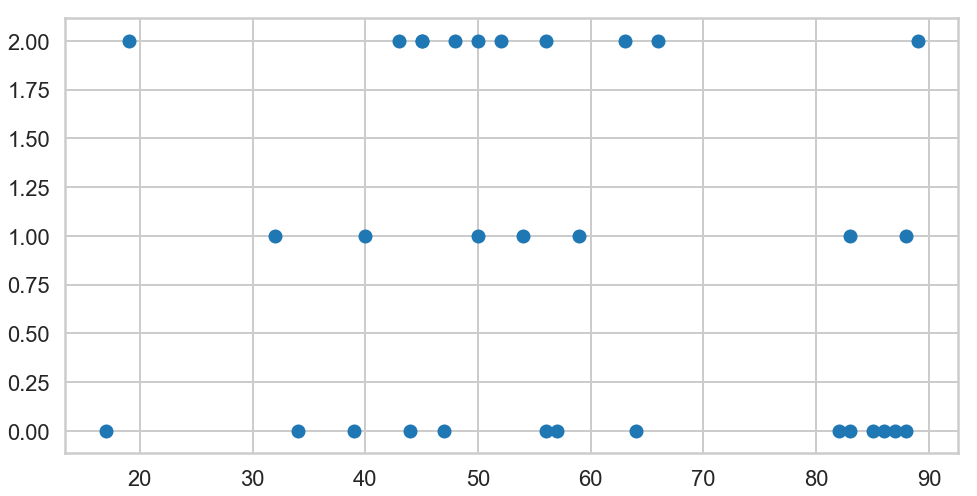

In [26]:
plt.scatter(df_offers['discount'], df_offers['cluster'])

In [27]:
# In practice, the PCA clusters do not seem to correlate well with the discount rates. This leaves us with quantity,
# varietal, and origin.

from scipy import stats
r, p = stats.pearsonr(df_offers['discount'], df_offers['cluster'])
r, p

(-0.20778148985668493, 0.25381421803098636)

In [28]:
range(1, 10)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

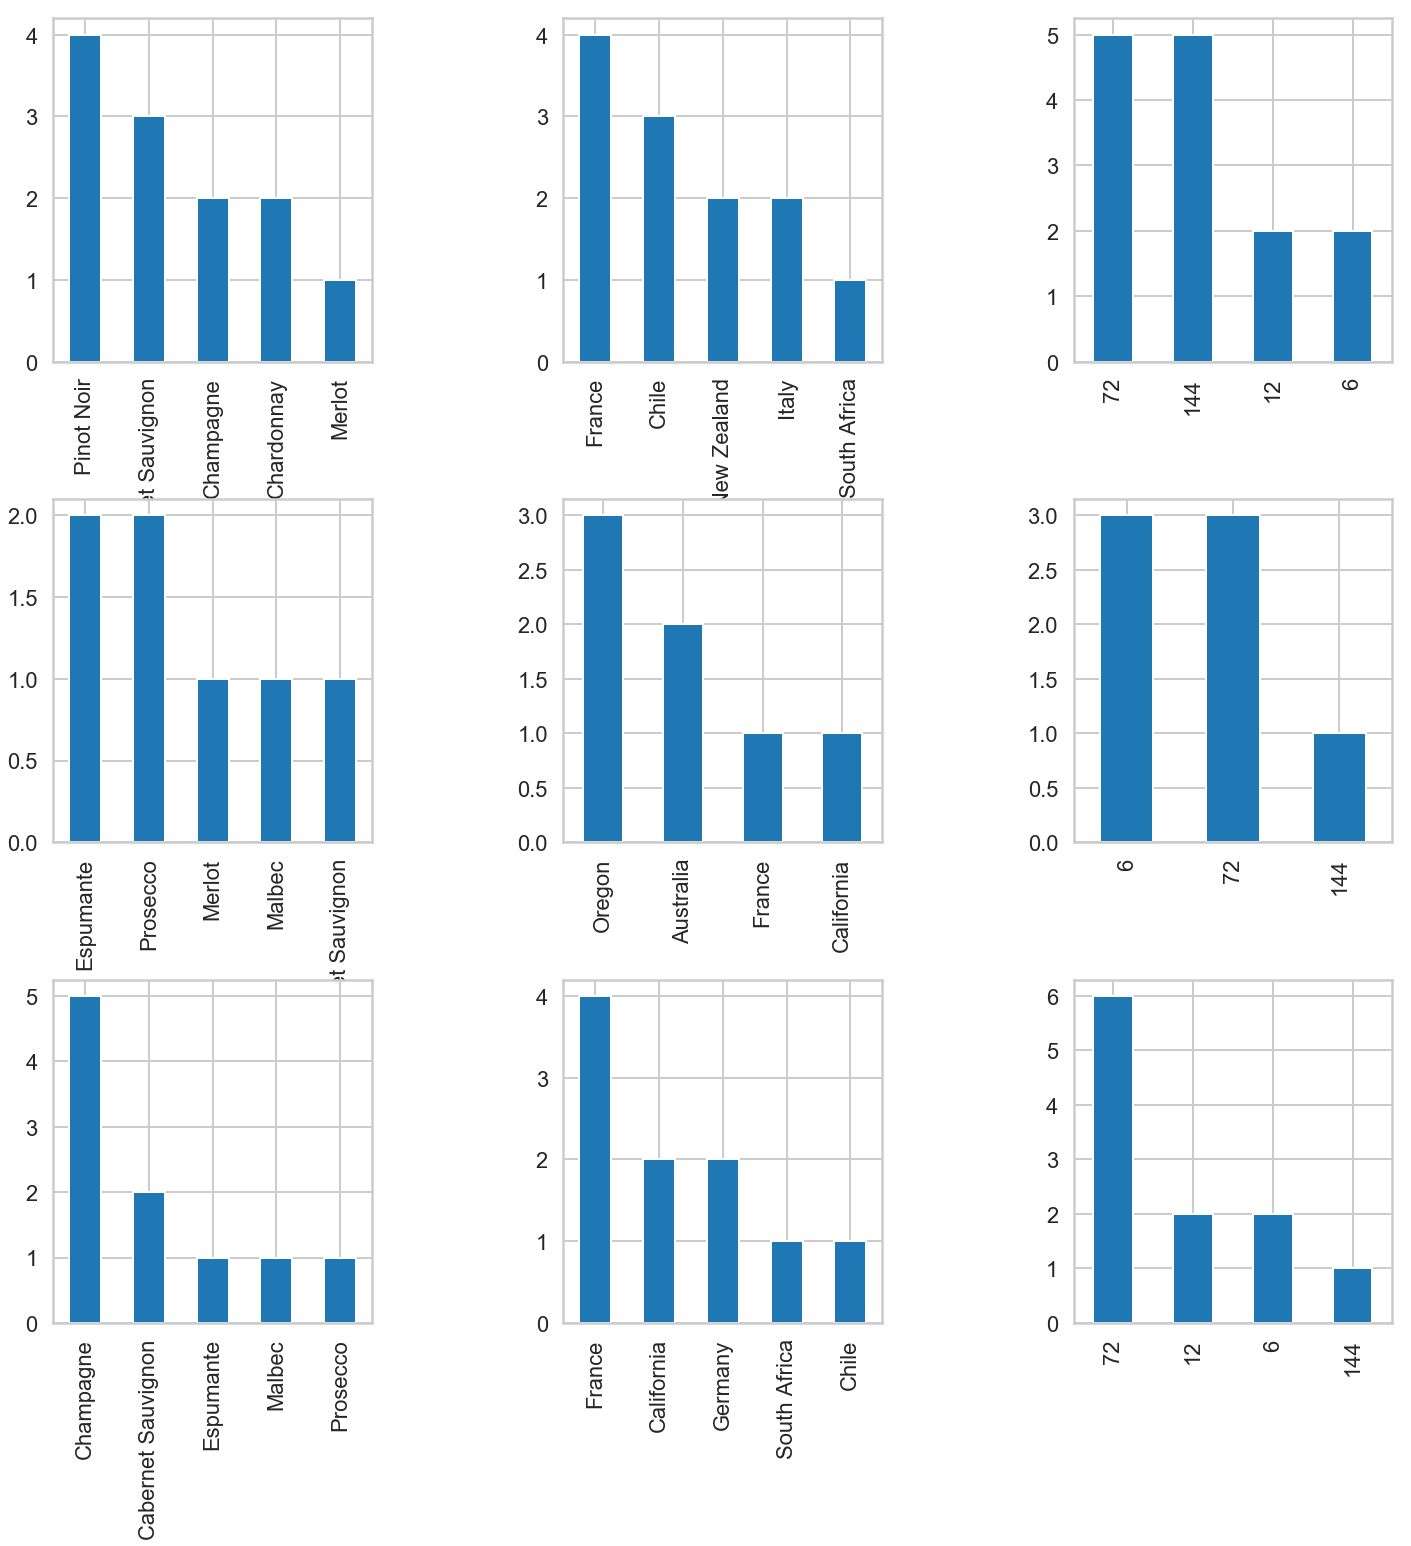

In [29]:
rcParams['figure.figsize'] = 24, 24
cols = ['varietal', 'origin', 'min_qty']
rows = [cluster1, cluster2, cluster3]

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.6)

for row in range (0, 3):
    for col in range (0, 3):
        plt.subplot(3, 3, row*3 + col + 1)
        rows[row][cols[col]].value_counts().head().plot('bar')

It appears that the first cluster is dominated by medium-sized orders of French Champagne, the second cluster is dominated by small orders of small orders of other sparkling wines (non-Champagne) from Oregon and Australia, and the third cluster is dominated by large orders of dry red wines from France. However, these tendencies are somewhat speculative, because the sample size is too small: with only 100 successful orders in the entire database, splitting the data into three groups and then further splitting each grou's data by categorical variables means that what appears to be a preponderance of, e.g., French wines in a cluster could be mere coincidence.

<div class="span5 alert alert-info">
<h3>Exercise Set V</h3>

<p>As we saw earlier, PCA has a lot of other uses. Since we wanted to visualize our data in 2 dimensions, restricted the number of dimensions to 2 in PCA. But what is the true optimal number of dimensions?</p>

<p><b>Exercise:</b> Using a new PCA object shown in the next cell, plot the `explained_variance_` field and look for the elbow point, the point where the curve's rate of descent seems to slow sharply. This value is one possible value for the optimal number of dimensions. What is it?</p>
</div>

In [30]:
X = sales_matrix
pca_trial = sklearn.decomposition.PCA(n_components=5)
pca_trial.fit(X)
np.sum(pca_trial.explained_variance_)

1.2366666595599718

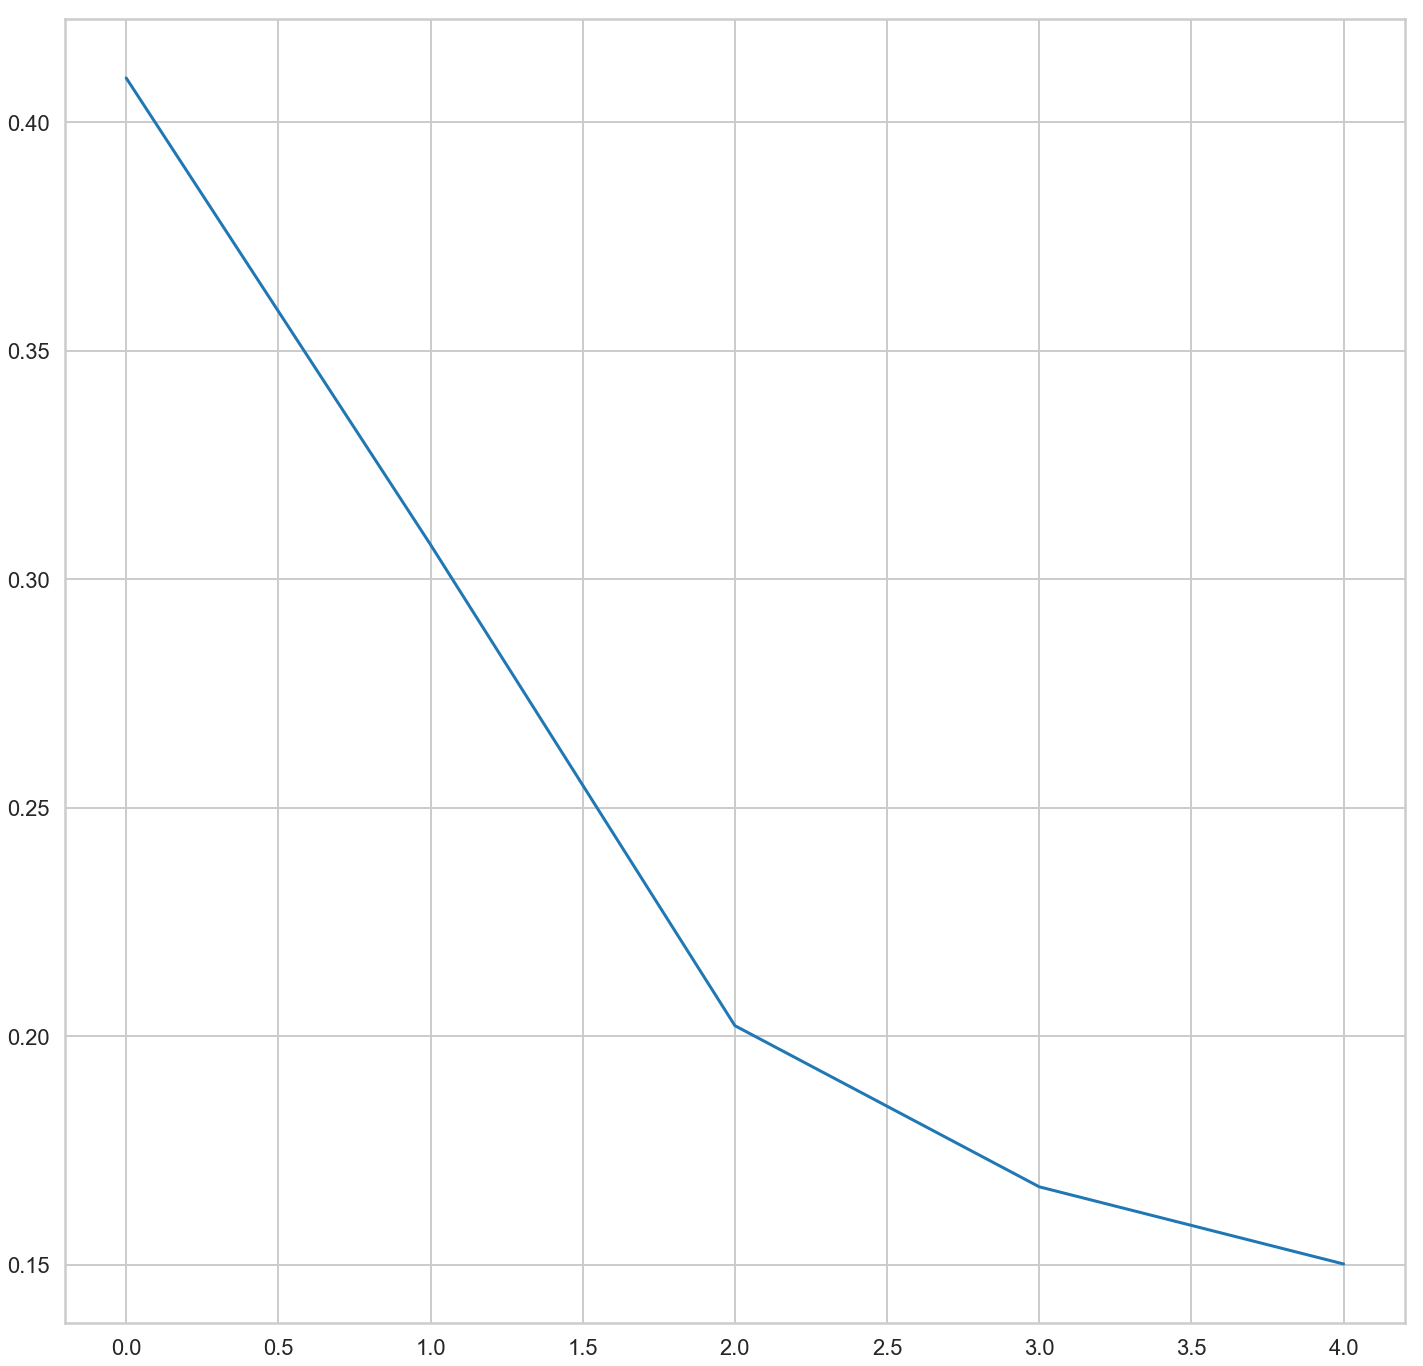

In [31]:
# When left to its own devices, for some reason the PCA function limits itself to only 8 dimensions. In fact, it seems
# to limit itself to 8 dimensions even if more are explicitly specified. The elbow could be at any of these points, because
# the slope steadily decreases as the dimensions go forward, but I would cut the analysis off at 4 dimensions.

import sklearn.decomposition
X = sales_matrix
pca_default = sklearn.decomposition.PCA()
plt.plot(pca_trial.explained_variance_)

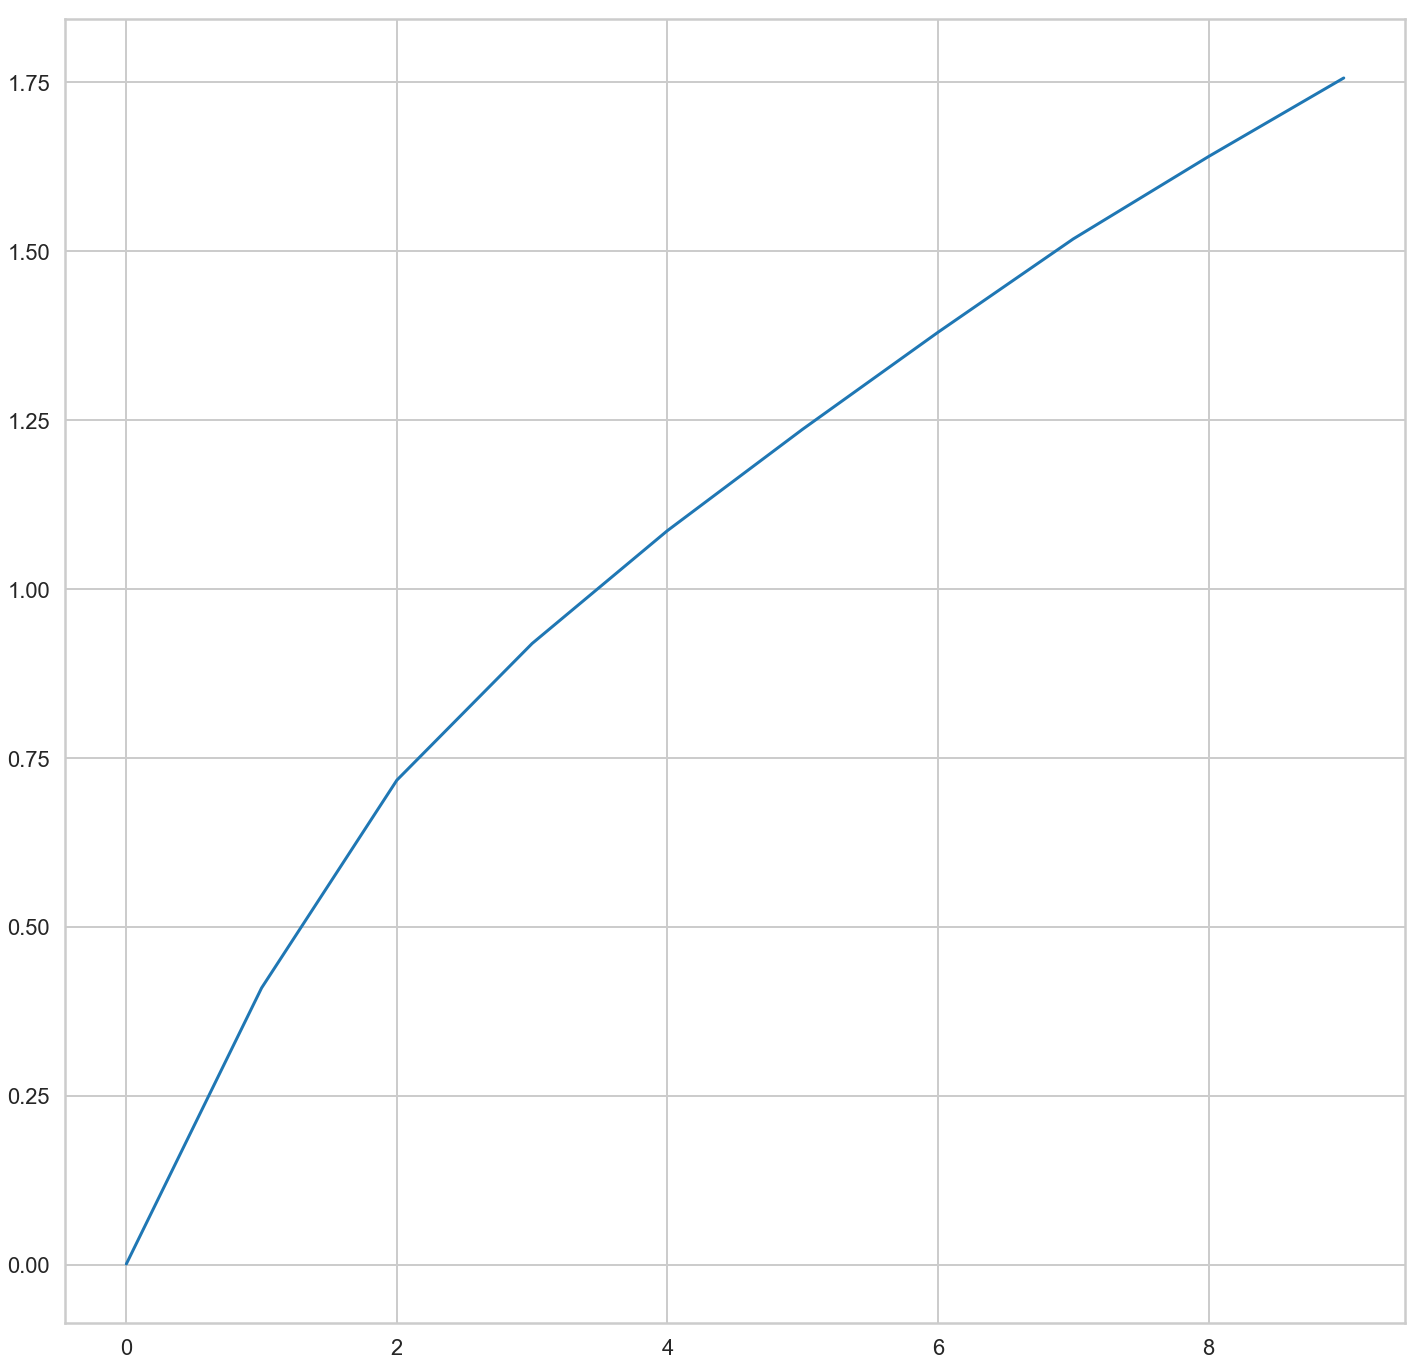

In [32]:
#your turn
# Initialize a new PCA model with a default number of components.
import sklearn.decomposition

# Do the rest on your own :)
X = sales_matrix
variance_results = np.empty(10)

for n_dims in range(1, 10):
    pca_trial = sklearn.decomposition.PCA(n_components = n_dims)
    pca_trial.fit(X)
    variance_results[n_dims] = np.sum(pca_trial.explained_variance_)

plt.plot(variance_results)


## Other Clustering Algorithms

k-means is only one of a ton of clustering algorithms. Below is a brief description of several clustering algorithms, and the table provides references to the other clustering algorithms in scikit-learn. 

* **Affinity Propagation** does not require the number of clusters $K$ to be known in advance! AP uses a "message passing" paradigm to cluster points based on their similarity. 

* **Spectral Clustering** uses the eigenvalues of a similarity matrix to reduce the dimensionality of the data before clustering in a lower dimensional space. This is tangentially similar to what we did to visualize k-means clusters using PCA. The number of clusters must be known a priori.

* **Ward's Method** applies to hierarchical clustering. Hierarchical clustering algorithms take a set of data and successively divide the observations into more and more clusters at each layer of the hierarchy. Ward's method is used to determine when two clusters in the hierarchy should be combined into one. It is basically an extension of hierarchical clustering. Hierarchical clustering is *divisive*, that is, all observations are part of the same cluster at first, and at each successive iteration, the clusters are made smaller and smaller. With hierarchical clustering, a hierarchy is constructed, and there is not really the concept of "number of clusters." The number of clusters simply determines how low or how high in the hierarchy we reference and can be determined empirically or by looking at the [dendogram](https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.cluster.hierarchy.dendrogram.html).

* **Agglomerative Clustering** is similar to hierarchical clustering but but is not divisive, it is *agglomerative*. That is, every observation is placed into its own cluster and at each iteration or level or the hierarchy, observations are merged into fewer and fewer clusters until convergence. Similar to hierarchical clustering, the constructed hierarchy contains all possible numbers of clusters and it is up to the analyst to pick the number by reviewing statistics or the dendogram.

* **DBSCAN** is based on point density rather than distance. It groups together points with many nearby neighbors. DBSCAN is one of the most cited algorithms in the literature. It does not require knowing the number of clusters a priori, but does require specifying the neighborhood size.

### Clustering Algorithms in Scikit-learn
<table border="1">
<colgroup>
<col width="15%" />
<col width="16%" />
<col width="20%" />
<col width="27%" />
<col width="22%" />
</colgroup>
<thead valign="bottom">
<tr><th>Method name</th>
<th>Parameters</th>
<th>Scalability</th>
<th>Use Case</th>
<th>Geometry (metric used)</th>
</tr>
</thead>
<tbody valign="top">
<tr><td>K-Means</span></a></td>
<td>number of clusters</td>
<td>Very large<span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span> with
MiniBatch code</td>
<td>General-purpose, even cluster size, flat geometry, not too many clusters</td>
<td>Distances between points</td>
</tr>
<tr><td>Affinity propagation</td>
<td>damping, sample preference</td>
<td>Not scalable with n_samples</td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Mean-shift</td>
<td>bandwidth</td>
<td>Not scalable with <span class="pre">n_samples</span></td>
<td>Many clusters, uneven cluster size, non-flat geometry</td>
<td>Distances between points</td>
</tr>
<tr><td>Spectral clustering</td>
<td>number of clusters</td>
<td>Medium <span class="pre">n_samples</span>, small <span class="pre">n_clusters</span></td>
<td>Few clusters, even cluster size, non-flat geometry</td>
<td>Graph distance (e.g. nearest-neighbor graph)</td>
</tr>
<tr><td>Ward hierarchical clustering</td>
<td>number of clusters</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints</td>
<td>Distances between points</td>
</tr>
<tr><td>Agglomerative clustering</td>
<td>number of clusters, linkage type, distance</td>
<td>Large <span class="pre">n_samples</span> and <span class="pre">n_clusters</span></td>
<td>Many clusters, possibly connectivity constraints, non Euclidean
distances</td>
<td>Any pairwise distance</td>
</tr>
<tr><td>DBSCAN</td>
<td>neighborhood size</td>
<td>Very large <span class="pre">n_samples</span>, medium <span class="pre">n_clusters</span></td>
<td>Non-flat geometry, uneven cluster sizes</td>
<td>Distances between nearest points</td>
</tr>
<tr><td>Gaussian mixtures</td>
<td>many</td>
<td>Not scalable</td>
<td>Flat geometry, good for density estimation</td>
<td>Mahalanobis distances to  centers</td>
</tr>
<tr><td>Birch</td>
<td>branching factor, threshold, optional global clusterer.</td>
<td>Large <span class="pre">n_clusters</span> and <span class="pre">n_samples</span></td>
<td>Large dataset, outlier removal, data reduction.</td>
<td>Euclidean distance between points</td>
</tr>
</tbody>
</table>
Source: http://scikit-learn.org/stable/modules/clustering.html

<div class="span5 alert alert-info">
<h3>Exercise Set VI</h3>

<p><b>Exercise:</b> Try clustering using the following algorithms. </p>
<ol>
<li>Affinity propagation
<li>Spectral clustering
<li>Agglomerative clustering
<li>DBSCAN
</ol>
<p>How do their results compare? Which performs the best? Tell a story why you think it performs the best.</p>
</div>


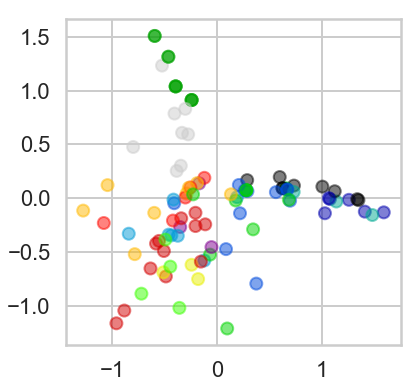

In [58]:
# Affinity Propagation

from sklearn.cluster import AffinityPropagation
model_aff = AffinityPropagation()
color = model_aff.fit_predict(X)
plt.scatter(sales_x, sales_y, c=color, cmap='nipy_spectral', alpha=0.5)
rcParams['figure.figsize'] = 6, 6
plt.show()

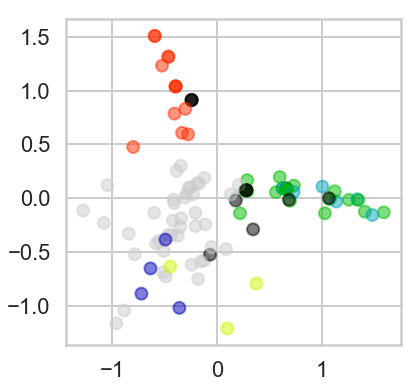

In [56]:
# Spectral Clustering

from sklearn.cluster import SpectralClustering
model_spec = SpectralClustering(n_clusters=7)
color = model_spec.fit_predict(X)
plt.scatter(sales_x, sales_y, c=color, cmap='nipy_spectral', alpha=0.5)
rcParams['figure.figsize'] = 6, 6
plt.show()

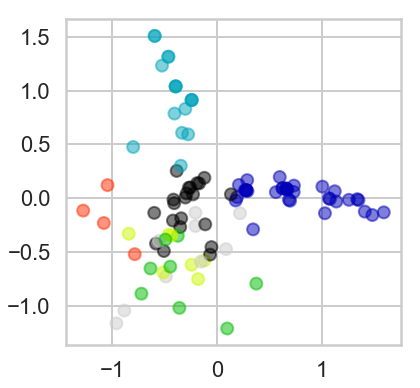

In [55]:
#Agglomerative Clustering

from sklearn.cluster import AgglomerativeClustering
model_agg = AgglomerativeClustering(n_clusters = 7)
color = model_agg.fit_predict(X)
plt.scatter(sales_x, sales_y, c=color, cmap='nipy_spectral', alpha=0.5)
rcParams['figure.figsize'] = 6, 6
plt.show()

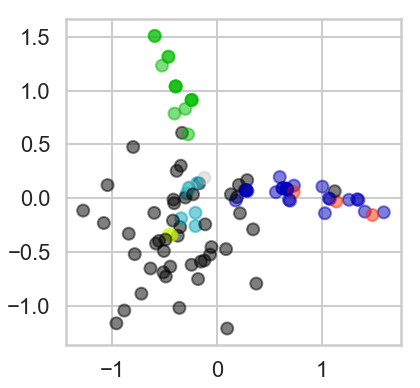

In [62]:
# DBSCAN

from sklearn.cluster import DBSCAN
model_dbs = DBSCAN(metric='euclidean', eps=1, min_samples=2)
color = model_dbs.fit_predict(X)
plt.scatter(sales_x, sales_y, c=color, cmap='nipy_spectral', alpha=0.5)
rcParams['figure.figsize'] = 6, 6
plt.show()

The AffinityPropagation technique did not appear to perform well with this dataset -- the proposed clusters are highly interwoven and do not appear to correspond to any conceptual groupings.

The remaining three techniques each have their pros and cons. The Spectral Clustering technique convincingly identifies a large grey cluster in the center, a medium-size red cluster at the top, a medium-size green cluster on the right-hand side, and smaller, idiosyncratic clusters of blue, yellow, teal, and black. The grey, red, and green clusters in this technique appear very well-defined, but the other four clusters feel a bit like "leftovers" -- it is not as clear that they have any meaningful similarities within their clusters.

The Agglomerative Clustering technique nicely divides the data into clusters of roughly even size and roughly even variance; no one cluster is much better defined or much worse defined than any other cluster, and all of the clusters are roughly plausible. However, there is significant uncertainty about whether several points should belong to one cluster or another. For example, the entire yellow cluster, slightly below the center of the graph, could easily belong to any of five other clusters.

The DBSCAN technique prominently displays a large black cluster in the bottom-left-hand portion of the graph, with a distinct green spur at the top and a distinct navy spur on the right-hand side. This mimics the three cluster pattern found by PCA. All three of these clusters are convincing, and they together account for the vast majority of the data. However, it is not apparent why the tiny grey, yellow, and red clusters have been broken off and treated separately. These clusters do not appear to belong to conceptually different groups compared to the main three clusters. Moreover, some of these groups are located near the centroids of other clusters, suggesting that they may 'poach' some of the core members of those clusters.

Given the likely purpose of this analysis, i.e., to identify stereotypical customers who can be sent targeted advertisements for specific types of additional wine orders, I would recommend using the Agglomerative Clustering technique. Designing targeted advertisements can be resource-intensive, so it is probably best to have a few large clusters that are each highly predictive. The Agglomerative Clustering technique breaks out three large clusters that can be used to target consumers in those clusters with reasonable confidence, and the smaller, less justified clusters in that technique do not 'poach' as many customers from the larger clusters, so the targeted advertisements will be more likely to reach the customers who are best suited to receive any particular ad.